<a name="1"></a>
## Packages 

- [pandas](http://pandas.org) is a famous library for data manipulation and analysis in Python.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib & seaborn ](http://matplotlib.org) is a famous library to plot graphs in Python.
- [sklearn]((http://sklearn.org)) Comprehensive Python library for machine learning. 


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import math 


## Problem Statement

- Build a model which predicts sales based on the money spent on different platforms for marketing.

## Dataset

- Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

- In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

In [2]:
# load the dataset
data = pd.read_csv("advertising.csv")

#### View the variables
Before starting on any task, it is useful to get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

In [3]:
# read the data
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# descriptive statistics
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# Checking Null values
x = data.isnull().sum()
print(x)
if x.sum() > 0:
    print("\nThere are Null values in the dataset")
else:
    print("\nThere are no Null values in the dataset, hence it is clean")

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no Null values in the dataset, hence it is clean


In [6]:
# Splitting features and target variable.
x = data.drop("Sales",axis=1)
y = data["Sales"]

#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `x` and `y` and see how many training examples you have in your dataset.

In [7]:
print ('The shape of x_train is:', x.shape)
print ('The shape of y_train is:', y.shape)

The shape of x_train is: (200, 3)
The shape of y_train is: (200,)


#### Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data.
- Many other problems that you will encounter in real life have more than two properties.When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


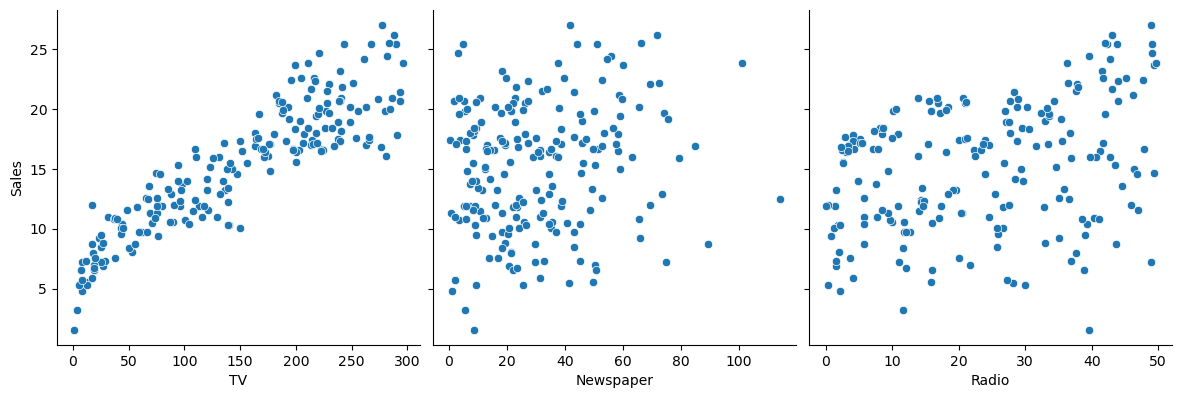

In [8]:
# Let's see how Sales are related with other variables using scatter plot.
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

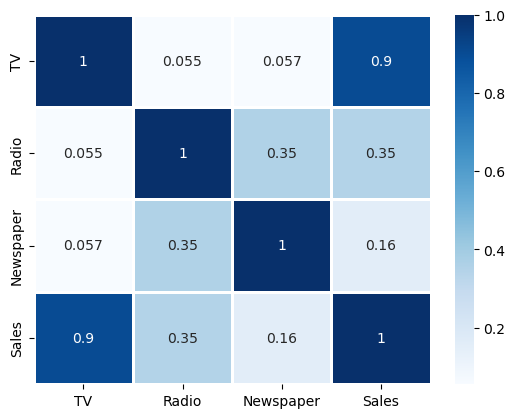

In [9]:
# Correlation analysis and visualization using heatmap.
sns.heatmap(data.corr(), cmap="Blues", annot = True, linewidths=1)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. 

## feature Scaling 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

<a name="4"></a>
## linear regression

In this problem we are going to fit the linear regression parameters $(w,b)$ to our dataset.
- The model function for linear regression, which is a function that maps from `x` (advertising on 'TV') to `y` (sales) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (TV) and output a prediction $f_{w,b}(x)$ (Sales).

<a name="5"></a>
## Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- we are going to implement a function to calculate $J(w,b)$ so that we can check the progress of our gradient descent implementation.

#### Cost function
the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- here $f_{w,b}(x^{(i)})$ is the model's prediction of Sales, as opposed to $y^{(i)}$, which is the actual Sales that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

In [11]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model 
        y (ndarray): Shape (m,) Label (Actual Sales)
        w, b (scalar): Parameters of the model
    
    Returns
        cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    
    m = x.shape[0]
    cost = 0
    for i in range(m):                                
        f_wb = np.dot(x[i], w) + b        
        cost += (y[i] - f_wb)**2       
    cost = cost / (2 * m)                         
    return cost

<a name="6"></a>
## Gradient descent 

implement the gradient for parameters $w, b$ for linear regression. 

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [12]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model 
      y (ndarray): Shape (m,) Label (Actual Sales)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m,n = x.shape            #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] += err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw


### Learning parameters using batch gradient descent

In [13]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
       
    J_history = []   # An array to store cost J and w's at each iteration primarily for graphing later
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b)  

        # Update Parameters using w, b, alpha and gradient
        w -= alpha * dj_dw.reshape(-1, 1)

        b -= alpha * dj_db             
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1][0]:8.2f}   ")

        
    return w, b, J_history #return final w,b and J history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [14]:
w_init = np.random.randn(x.shape[1], 1)  # Initialize parameters with zeros
b_init = 0
iterations = 1000
alpha = 0.001
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x, y, w_init, b_init,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
#print(f"b,w found by gradient descent: {w_final},{b_final}")
print(f"b,w found by gradient descent: {b_final},{w_final}")
m,_ = x.shape
for i in range(m):
    print(f"prediction: {np.dot(x[i], w_final) + b_final}, target value: {y[i]}")

Iteration    0: Cost   125.47   
Iteration  100: Cost   102.68   
Iteration  200: Cost    84.09   
Iteration  300: Cost    68.93   
Iteration  400: Cost    56.56   
Iteration  500: Cost    46.45   
Iteration  600: Cost    38.21   
Iteration  700: Cost    31.47   
Iteration  800: Cost    25.97   
Iteration  900: Cost    21.48   
b,w found by gradient descent: [9.56708438],[[ 3.38216346]
 [ 1.09308568]
 [-0.11415965]]
prediction: [13.71708765], target value: 22.1
prediction: [6.62452509], target value: 10.4
prediction: [5.90633245], target value: 12.0
prediction: [10.92748915], target value: 16.5
prediction: [9.83398712], target value: 17.9
prediction: [5.76211477], target value: 7.2
prediction: [6.77168424], target value: 11.8
prediction: [8.33615709], target value: 13.2
prediction: [2.69277073], target value: 4.8
prediction: [10.17460718], target value: 15.6
prediction: [5.1148025], target value: 12.6
prediction: [12.43295347], target value: 17.4
prediction: [5.38771629], target value:

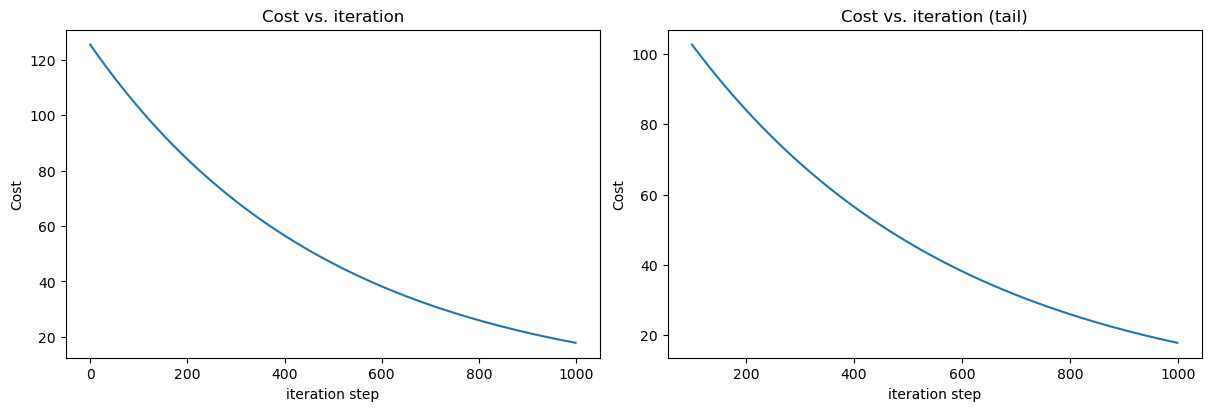

In [15]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## Using inbuild function

In [16]:
from sklearn.linear_model import SGDRegressor

### Create and fit the regression model

In [17]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x, y)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 21, number of weight updates: 4201.0


In [18]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:w: {w_norm}, b:{b_norm}")

model parameters:w: [4.65764255 1.5699345  0.01557055], b:[15.11559447]


In [21]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x)
prediction = pd.DataFrame(np.c_[y,y_pred],columns =("Actual","Predicted"))
prediction



,Actual,Predicted
0,22.1,21.201445
1,10.4,11.249007
2,12.0,10.481245
3,16.5,17.290006
4,17.9,15.650234
...,...,...
195,7.6,7.110067
196,14.0,10.278847
197,14.8,15.247283
198,25.5,24.554216


<div style="font-family: cursive; background-color: #333; color: white; padding: 10px;">
    <h2>Thank you so much</h2>
</div>
